In [1]:
!pip install naiveautoml

# Minimal Example: Applying Naive AutoML to iris

In [2]:
from sklearn.datasets import fetch_openml
import sklearn.datasets
import naiveautoml

X, y = fetch_openml(data_id=61, return_X_y=True)  # iris
naml = naiveautoml.NaiveAutoML(show_progress = True, max_hpo_iterations=10)
naml.fit(X, y)

Progress for algorithm selection:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:07<00:00,  4.12it/s]


Progress for hyperparameter optimization:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:24<00:00,  2.49s/it]


In [3]:
naml.chosen_model

Pipeline(steps=[('learner', ExtraTreesClassifier())])

In [4]:
naml.leaderboard

,order,time,runtime,pipeline,default_hp,neg_log_loss,new_best,evaluation_report,status,exception,data-pre-processor_class,data-pre-processor_hps,feature-pre-processor_class,feature-pre-processor_hps,learner_class,learner_hps
0,0,1.728326e+09,0.522395,((ExtraTreeClassifier(random_state=1959646086)...,True,-0.0570,True,"{'neg_log_loss': [-0.035560745675446245, -0.03...",ok,None,None,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
1,8,1.728326e+09,0.028414,(QuadraticDiscriminantAnalysis()),True,-0.0648,False,"{'neg_log_loss': [-0.075598137132969, -0.08836...",ok,None,None,None,None,None,sklearn.discriminant_analysis.QuadraticDiscrim...,None
2,5,1.728326e+09,0.021561,(GaussianNB()),True,-0.0763,False,"{'neg_log_loss': [-0.1416176110952844, -0.0492...",ok,None,None,None,None,None,sklearn.naive_bayes.GaussianNB,None
3,7,1.728326e+09,0.030384,(LinearDiscriminantAnalysis()),True,-0.0775,False,"{'neg_log_loss': [-0.04503314380131569, -0.091...",ok,None,None,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
4,1,1.728326e+09,0.588323,(RandomForestClassifier()),True,-0.0821,False,"{'neg_log_loss': [-0.04251933728837645, -0.189...",ok,None,None,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
5,22,1.728326e+09,0.506231,"(VarianceThreshold(), ExtraTreesClassifier())",True,-0.0890,False,"{'neg_log_loss': [-0.07277377026732057, -0.074...",ok,None,sklearn.feature_selection._variance_threshold....,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
6,17,1.728326e+09,0.575651,"(Normalizer(), ExtraTreesClassifier())",True,-0.0899,False,"{'neg_log_loss': [-0.02478927940887918, -0.159...",ok,None,sklearn.preprocessing._data.Normalizer,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
7,13,1.728326e+09,0.097281,(LogisticRegression()),True,-0.1103,False,"{'neg_log_loss': [-0.09439910457891872, -0.131...",ok,None,None,None,None,None,sklearn.linear_model.LogisticRegression,None
8,29,1.728326e+09,0.660204,"(PolynomialFeatures(), ExtraTreesClassifier())",True,-0.1176,False,"{'neg_log_loss': [-0.14511456353964386, -0.070...",ok,None,None,None,sklearn.preprocessing._polynomial.PolynomialFe...,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
9,23,1.728326e+09,0.685154,"(FastICA(), ExtraTreesClassifier())",True,-0.1258,False,"{'neg_log_loss': [-0.1329229165317684, -0.0874...",ok,None,None,None,sklearn.decomposition._fastica.FastICA,None,sklearn.ensemble._forest.ExtraTreesClassifier,None


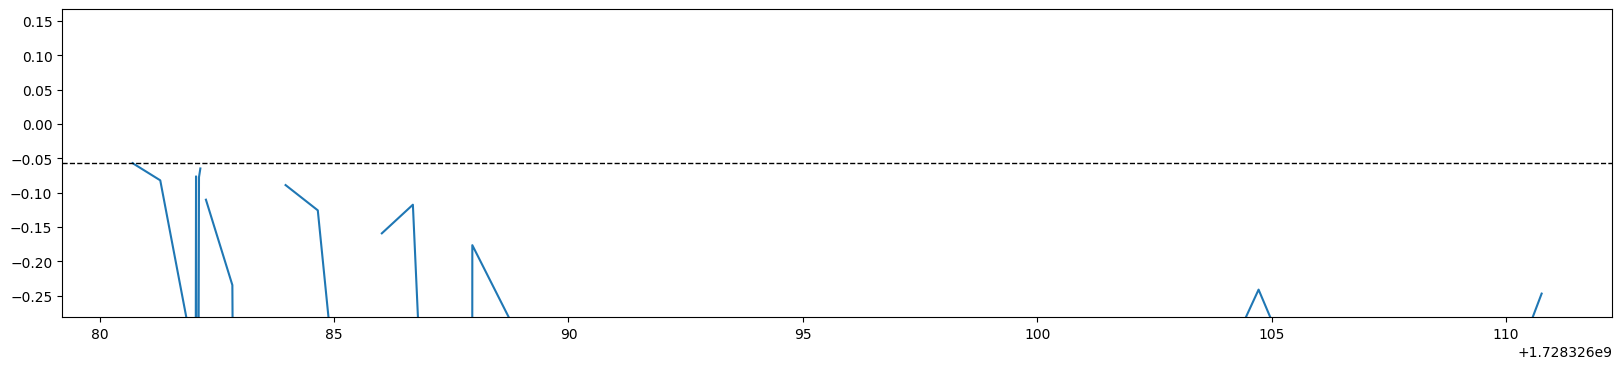

In [5]:
import matplotlib.pyplot as plt

def plot_history(naml):
    scoring = naml.task.scoring["name"]
    
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.step(naml.history["time"], naml.history[scoring])
    ax.axhline(naml.history[scoring].max(), linestyle="--", color="black", linewidth=1)
    max_val = naml.history[scoring].max()
    median_val = naml.history[scoring].median()
    ax.set_ylim([median_val, max_val + (max_val - median_val)])
    plt.show()

plot_history(naml)

## Apply Naive AutoML to the eucalyptus dataset (with categoricals and missing values)

In [6]:
X, y = fetch_openml(data_id=188, return_X_y=True)
print(f"Num of missing values: {X.isna().sum().sum()}")
X

Num of missing values: 448


,Abbrev,Rep,Locality,Map_Ref,Latitude,Altitude,Rainfall,Frosts,Year,Sp,PMCno,DBH,Ht,Surv,Vig,Ins_res,Stem_Fm,Crown_Fm,Brnch_Fm
0,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,co,1520.0,18.45,9.96,40.0,4.0,3.0,3.5,4.0,3.5
1,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,fr,1487.0,13.15,9.65,90.0,4.5,4.0,3.5,3.5,3.0
2,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ma,1362.0,10.32,6.50,50.0,2.3,2.5,3.0,3.5,3.0
3,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,nd,1596.0,14.80,9.48,70.0,3.7,3.0,3.3,4.0,3.5
4,Cra,1,Central_Hawkes_Bay,N135_382/137,39__38,100,850,-2,1980,ni,2088.0,14.50,10.78,90.0,4.0,2.7,3.3,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,fa,2548.0,41.63,12.64,28.0,4.2,3.2,2.3,1.9,1.7
732,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,fr,2552.0,33.35,10.61,33.0,4.5,4.0,2.8,3.0,1.5
733,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,ni,2568.0,28.21,9.47,94.0,4.6,3.0,2.0,1.8,1.2
734,WSh,1,Southern_Hawkes_Bay,N151_922/226,40__36,100,1250,-2,1983,ob,1522.0,27.36,11.49,67.0,4.7,3.3,3.4,3.4,3.0


In [7]:
naml = naiveautoml.NaiveAutoML(show_progress=True, max_hpo_iterations=10)
naml.fit(X, y)

Progress for algorithm selection:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:21<00:00,  1.49it/s]


Progress for hyperparameter optimization:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


In [8]:
print(naml.chosen_model)

Pipeline(steps=[('impute_and_binarize',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Rep', 'Altitude',
                                                   'Rainfall', 'Frosts', 'Year',
                                                   'PMCno', 'DBH', 'Ht', 'Surv',
                                                   'Vig', 'Ins_res', 'Stem_Fm',
                                                   'Crown_Fm', 'Brnch_Fm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binarizer',
        

In [9]:
naml.leaderboard

,order,time,runtime,pipeline,default_hp,neg_log_loss,new_best,evaluation_report,status,exception,data-pre-processor_class,data-pre-processor_hps,feature-pre-processor_class,feature-pre-processor_hps,learner_class,learner_hps
0,29,1.728326e+09,2.947797,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.7627,True,"{'neg_log_loss': [-0.7863294976455495, -0.7634...",ok,None,None,None,sklearn.preprocessing._polynomial.PolynomialFe...,None,sklearn.ensemble._forest.RandomForestClassifier,None
1,1,1.728326e+09,2.122452,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.8041,True,"{'neg_log_loss': [-0.7672424451231477, -0.7532...",ok,None,None,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
2,22,1.728326e+09,1.680269,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.8271,False,"{'neg_log_loss': [-0.8780849948595296, -0.8649...",ok,None,sklearn.feature_selection._variance_threshold....,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
3,17,1.728326e+09,1.965827,"(ColumnTransformer(transformers=[('num',\n ...",True,-0.8628,False,"{'neg_log_loss': [-0.8932091820019521, -0.8652...",ok,None,sklearn.preprocessing._data.Normalizer,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
4,34,1.728326e+09,5.485827,"(ColumnTransformer(transformers=[('num',\n ...",False,-0.9799,True,"{'neg_log_loss': [-0.9702446225658047, -1.0076...",ok,None,None,None,sklearn.preprocessing._polynomial.PolynomialFe...,"{'degree': 2, 'include_bias': 'True', 'interac...",sklearn.ensemble._forest.RandomForestClassifier,"{'bootstrap': 'False', 'criterion': 'gini', 'm..."
5,0,1.728326e+09,3.453922,"(ColumnTransformer(transformers=[('num',\n ...",True,-1.0150,True,"{'neg_log_loss': [-0.8030745978803508, -1.1351...",ok,None,None,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
6,28,1.728326e+09,3.102600,"(ColumnTransformer(transformers=[('num',\n ...",True,-1.0335,False,"{'neg_log_loss': [-1.001467758467775, -1.04278...",ok,None,None,None,sklearn.decomposition._pca.PCA,None,sklearn.ensemble._forest.RandomForestClassifier,None
7,30,1.728326e+09,1.492167,"(ColumnTransformer(transformers=[('num',\n ...",True,-1.1590,False,"{'neg_log_loss': [-0.8879810952815211, -1.1439...",ok,None,None,None,sklearn.feature_selection._univariate_selectio...,None,sklearn.ensemble._forest.RandomForestClassifier,None
8,40,1.728326e+09,5.996469,"(ColumnTransformer(transformers=[('num',\n ...",False,-1.2337,True,"{'neg_log_loss': [-1.2702149477323301, -1.2421...",ok,None,None,None,sklearn.preprocessing._polynomial.PolynomialFe...,"{'degree': 3, 'include_bias': 'False', 'intera...",sklearn.ensemble._forest.RandomForestClassifier,"{'bootstrap': 'False', 'criterion': 'gini', 'm..."
9,13,1.728326e+09,0.557217,"(ColumnTransformer(transformers=[('num',\n ...",True,-1.4292,False,"{'neg_log_loss': [-1.463201571062134, -1.42270...",ok,None,None,None,None,None,sklearn.linear_model.LogisticRegression,None


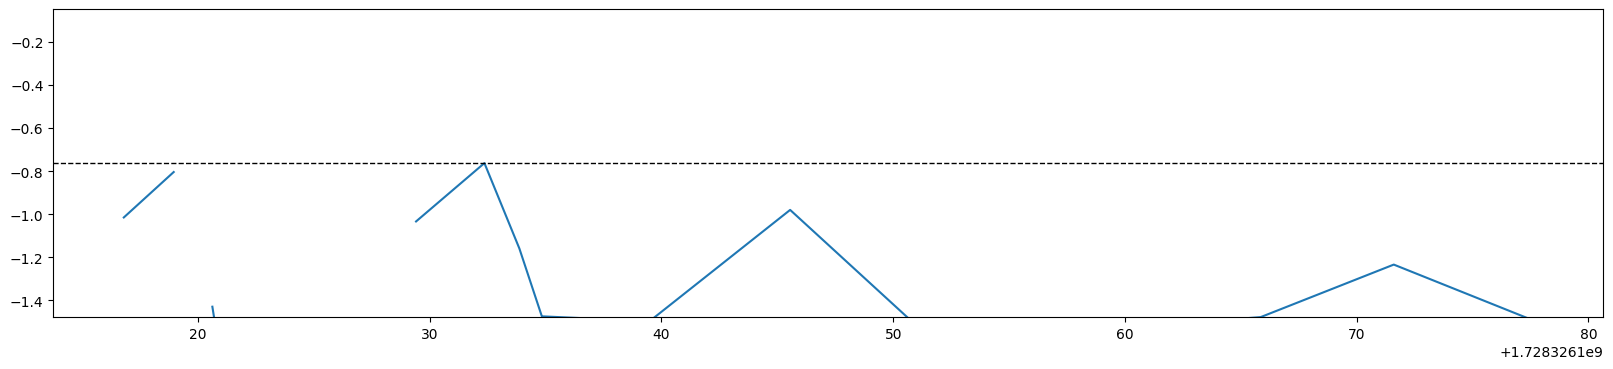

In [10]:
plot_history(naml)

# Apply Naive AutoML to breast cancer with logging enabled

In [11]:
# configure logger
import logging
logger = logging.getLogger('naiveautoml')
logger.setLevel(logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

logger = logging.getLogger('naiveautoml.evalpool')
logger.setLevel(logging.WARN)
ch = logging.StreamHandler()
ch.setLevel(logging.WARN)
formatter = logging.Formatter(
    '%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

In [12]:
%%time
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

naml = naiveautoml.NaiveAutoML(
    show_progress=True,
    timeout_overall=30,
    max_hpo_iterations=1000
)
naml.fit(X_train, y_train)

2024-10-07 20:36:21,312 - naiveautoml - INFO - Automatically inferred task type: classification
2024-10-07 20:36:21,342 - naiveautoml - INFO - There are 0 categorical features, which will be binarized.
2024-10-07 20:36:21,342 - naiveautoml - INFO - Missing values for the different attributes are [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
2024-10-07 20:36:21,343 - naiveautoml - INFO - Optimizing pipeline under the following conditions.
                
        Input type: <class 'numpy.ndarray'> (sparse: False)
        Input shape: (426, 30)
        Target type: <class 'numpy.ndarray'> (sparse: False)
        Target shape: (426,).
        Scoring: {'name': 'roc_auc', 'fun': make_scorer(roc_auc_score, response_method=('decision_function', 'predict_proba'))}
        Other scorings computed: []
        Timeout Overall: 30
        Timeout per Candidate: 300
        Max HPO iterations: 1000
        Max HPO iterations w/o improvement: 100
        Max HPO time (s) w/o impro

(569, 30)
(569,)
(426, 30)
(143, 30)
Progress for algorithm selection:


  0%|                                                                                                                                                                  | 0/32 [00:00<?, ?it/s]2024-10-07 20:36:21,347 - naiveautoml - INFO - --------------------------------------------------
2024-10-07 20:36:21,348 - naiveautoml - INFO - Selecting component for step with name: learner
2024-10-07 20:36:21,348 - naiveautoml - INFO - --------------------------------------------------
2024-10-07 20:36:21,349 - naiveautoml - INFO - Evaluating sklearn.ensemble._forest.ExtraTreesClassifier.Timeout: 300. Remaining time: 19.963164806365967
2024-10-07 20:36:21,907 - naiveautoml - INFO - Observed score of 0.9909 for default configuration of sklearn.ensemble._forest.ExtraTreesClassifier
  3%|████▊                                                                                                                                                     | 1/32 [00:00<00:17,  1.78it/s]2024-10-07 20:36:21,910 - nai

Progress for hyperparameter optimization:


  0%|                                                                                                                                                                | 0/1000 [00:00<?, ?it/s]2024-10-07 20:36:41,167 - naiveautoml - INFO - --------------------------------------------------
2024-10-07 20:36:41,167 - naiveautoml - INFO - Entering HPO phase.Remaining time: 10.14s
2024-10-07 20:36:41,168 - naiveautoml - INFO - --------------------------------------------------
2024-10-07 20:36:41,168 - naiveautoml - INFO - Starting 1-th HPO step. Currently best known score is -inf
2024-10-07 20:36:43,053 - naiveautoml - INFO - Observed score of 0.9953 for params Configuration(values={
  'learner:early_stop': 'valid',
  'learner:l2_regularization': 6.82354538e-05,
  'learner:learning_rate': 0.0213251133695,
  'learner:loss': 'log_loss',
  'learner:max_bins': 255,
  'learner:max_depth': 'None',
  'learner:max_leaf_nodes': 518,
  'learner:min_samples_leaf': 28,
  'learner:scoring': 'loss',
  'le

CPU times: user 1min 31s, sys: 32 s, total: 2min 3s
Wall time: 28.7 s


In [13]:
naml.history

,time,runtime,pipeline,default_hp,roc_auc,new_best,evaluation_report,status,exception,data-pre-processor_class,data-pre-processor_hps,feature-pre-processor_class,feature-pre-processor_hps,learner_class,learner_hps
0,1.728326e+09,0.555445,(ExtraTreesClassifier()),True,0.9909,True,"{'roc_auc': [0.9866908650937689, 0.97973381730...",ok,None,None,None,None,None,sklearn.ensemble._forest.ExtraTreesClassifier,None
1,1.728326e+09,0.948848,(RandomForestClassifier()),True,0.9939,True,"{'roc_auc': [0.9945553539019965, 0.98396854204...",ok,None,None,None,None,None,sklearn.ensemble._forest.RandomForestClassifier,None
2,1.728326e+09,0.794000,(HistGradientBoostingClassifier()),True,0.9972,True,"{'roc_auc': [0.9993950393224441, 0.99334543254...",ok,None,None,None,None,None,sklearn.ensemble.HistGradientBoostingClassifier,None
3,1.728326e+09,0.021051,(BernoulliNB()),True,0.5158,False,"{'roc_auc': [0.5, 0.5263157894736842, 0.517543...",ok,None,None,None,None,None,sklearn.naive_bayes.BernoulliNB,None
4,1.728326e+09,0.041461,(DecisionTreeClassifier()),True,0.9152,False,"{'roc_auc': [0.939201451905626, 0.939503932244...",ok,None,None,None,None,None,sklearn.tree._classes.DecisionTreeClassifier,None
5,1.728326e+09,0.017106,(GaussianNB()),True,0.9925,False,"{'roc_auc': [0.9891107078039928, 0.99213551119...",ok,None,None,None,None,None,sklearn.naive_bayes.GaussianNB,None
6,1.728326e+09,0.184520,(KNeighborsClassifier()),True,0.9461,False,"{'roc_auc': [0.9552329098608591, 0.93768905021...",ok,None,None,None,None,None,sklearn.neighbors._classification.KNeighborsCl...,None
7,1.728326e+09,0.058902,(LinearDiscriminantAnalysis()),True,0.9909,False,"{'roc_auc': [0.9963702359346642, 0.96491228070...",ok,None,None,None,None,None,sklearn.discriminant_analysis.LinearDiscrimina...,None
8,1.728326e+09,0.040780,(QuadraticDiscriminantAnalysis()),True,0.9864,False,"{'roc_auc': [0.9624924379915305, 0.99758015728...",ok,None,None,None,None,None,sklearn.discriminant_analysis.QuadraticDiscrim...,None
9,1.728326e+09,3.260550,(SVC(kernel='linear')),True,0.9926,False,"{'roc_auc': [0.9975801572897761, 0.98850574712...",ok,None,None,None,None,None,sklearn.svm._classes.SVC,None


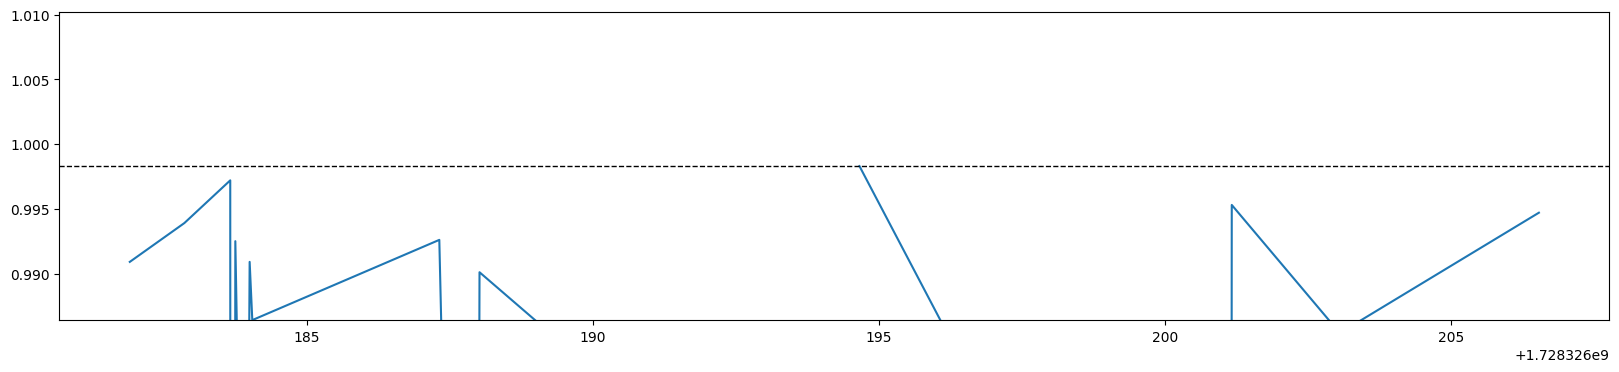

In [14]:
plot_history(naml)